In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns


In [4]:
spread_data = pd.read_csv('/Users/mattammirati/Desktop/jupyter/spreadspoke_scores.csv')

In [5]:
spread_data.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


In [6]:
spread_data.describe()

,schedule_season,score_home,score_away,spread_favorite,weather_temperature,weather_wind_mph,weather_humidity
count,13801.000000,13801.000000,13801.000000,11322.000000,12423.000000,12407.000000,8476.000000
mean,1996.638794,22.479965,19.797768,-5.372946,58.932222,7.624647,67.212246
std,16.428890,10.523516,10.152570,3.438739,15.535721,5.713715,15.795938
min,1966.000000,0.000000,0.000000,-26.500000,-6.000000,0.000000,4.000000
25%,1983.000000,15.000000,13.000000,-7.000000,48.000000,2.000000,57.000000
50%,1998.000000,22.000000,20.000000,-4.500000,62.000000,8.000000,69.000000
75%,2011.000000,29.000000,27.000000,-3.000000,72.000000,11.000000,79.000000
max,2023.000000,72.000000,62.000000,0.000000,97.000000,40.000000,100.000000


In [9]:
print(f"columns and rows: ", spread_data.shape)

columns and rows:  (13801, 17)


In [10]:
#check null values
spread_data.isna().sum()

schedule_date              0
schedule_season            0
schedule_week              0
schedule_playoff           0
team_home                  0
score_home                 0
score_away                 0
team_away                  0
team_favorite_id        2479
spread_favorite         2479
over_under_line         2489
stadium                    0
stadium_neutral            0
weather_temperature     1378
weather_wind_mph        1394
weather_humidity        5325
weather_detail         10776
dtype: int64

In [11]:
spread_data.nunique()

schedule_date          2600
schedule_season          58
schedule_week            22
schedule_playoff          2
team_home                44
score_home               63
score_away               58
team_away                44
team_favorite_id         34
spread_favorite          47
over_under_line          69
stadium                 119
stadium_neutral           2
weather_temperature     101
weather_wind_mph         34
weather_humidity         95
weather_detail            8
dtype: int64

In [13]:
#going to remove rows with missing data in certain columns

spread_data.dropna(subset=['team_favorite_id', 'spread_favorite', 'over_under_line', 'weather_temperature', 'weather_wind_mph', 'weather_humidity', 'weather_detail'], inplace=True)

In [15]:
#check nulls in no null spread
spread_data.isna().sum()


schedule_date          0
schedule_season        0
schedule_week          0
schedule_playoff       0
team_home              0
score_home             0
score_away             0
team_away              0
team_favorite_id       0
spread_favorite        0
over_under_line        0
stadium                0
stadium_neutral        0
weather_temperature    0
weather_wind_mph       0
weather_humidity       0
weather_detail         0
dtype: int64

In order to handle the data listed here that had empty rows, I just removed them. We have enough data without null values to make this work.

In [16]:
print(spread_data['schedule_week'].head(20))

538      Superbowl
727      Superbowl
2500     Superbowl
9774             3
9780             3
9781             3
9783             3
9797             4
9822             6
9845             8
9927            13
9935            14
9944            14
9945            14
9970            16
9982            17
10014            1
10023            1
10041            3
10042            3
Name: schedule_week, dtype: object


In [19]:
print(spread_data['score_away'].head(25))


538      16
727       7
2500     35
9774      3
9780     10
9781     17
9783     14
9797     21
9822      0
9845      7
9927     21
9935      3
9944     45
9945     34
9970     10
9982      7
10014    18
10023    10
10041    17
10042    20
10057    38
10103    24
10105    23
10134    20
10148    39
Name: score_away, dtype: int64
538       7
727      23
2500     31
9774     34
9780     26
9781     24
9783     34
9797     27
9822     59
9845     30
9927     22
9935     48
9944     38
9945     13
9970     48
9982     30
10014    31
10023     9
10041    24
10042     7
10057    14
10103    28
10105    22
10134    23
10148    26
Name: score_home, dtype: int64


In [20]:
print(spread_data['score_home'].head(25))

538       7
727      23
2500     31
9774     34
9780     26
9781     24
9783     34
9797     27
9822     59
9845     30
9927     22
9935     48
9944     38
9945     13
9970     48
9982     30
10014    31
10023     9
10041    24
10042     7
10057    14
10103    28
10105    22
10134    23
10148    26
Name: score_home, dtype: int64


In [21]:
#compare the scores

home_win = (spread_data['score_home'] > spread_data['score_away']).sum()
away_win = (spread_data['score_home'] < spread_data['score_away']).sum()

print(f'Home team won {home_win} times')
print(f'Away team won {away_win} times')


Home team won 61 times
Away team won 45 times


In [22]:
filtered_by_weather = spread_data[spread_data['weather_temperature'] < 55]

#new column for if the home team won

filtered_by_weather['home_team_won'] = filtered_by_weather['score_home'] > filtered_by_weather['score_away']

print(filtered_by_weather.head(10))

      schedule_date  schedule_season schedule_week  schedule_playoff  \
9822     10/18/2009             2009             6             False   
9845      11/1/2009             2009             8             False   
9935     12/13/2009             2009            14             False   
9944     12/13/2009             2009            14             False   
9945     12/13/2009             2009            14             False   
9970     12/27/2009             2009            16             False   
9982       1/3/2010             2009            17             False   
10057     10/3/2010             2010             4             False   
10148    11/14/2010             2010            10             False   
10202    12/12/2010             2010            14             False   

                  team_home  score_home  score_away             team_away  \
9822   New England Patriots          59           0      Tennessee Titans   
9845       Baltimore Ravens          30           7  

/var/folders/pl/4pny6kms2p307m4vtyh01smr0000gn/T/ipykernel_85638/1292561689.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_by_weather['home_team_won'] = filtered_by_weather['score_home'] > filtered_by_weather['score_away']


In [24]:
lower_than_55 = (spread_data['weather_temperature'] < 55).sum()
print(lower_than_55)

52


In [25]:
home_team_wins = filtered_by_weather['home_team_won'].sum()
print(f'The home team won {home_team_wins} times when the weather was below 55 degrees out of a total of {lower_than_55}')

The home team won 30 times when the weather was below 55 degrees out ofa total of 52


In [27]:
percent_home_wins_under_55 = (home_team_wins/lower_than_55) * 100
print(f'The home team won {percent_home_wins_under_55: .2f} percent of the time when the temperature was below 55 degrees')

The home team won  57.69 percent of the time when the temperature was below 55 degrees


In [31]:
#check who won by weather wind mph
filtered_by_wind = spread_data[spread_data['weather_wind_mph'] < 12]

filtered_by_wind['home_team_won_wind'] = filtered_by_wind['score_home'] > filtered_by_wind['score_away']


/var/folders/pl/4pny6kms2p307m4vtyh01smr0000gn/T/ipykernel_85638/3227871612.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_by_wind['home_team_won_wind'] = filtered_by_wind['score_home'] > filtered_by_wind['score_away']


In [30]:
lower_than_12 = (spread_data['weather_wind_mph'] < 12).sum()
print(lower_than_12)

88


In [33]:
home_team_wins_wind = filtered_by_wind['home_team_won_wind'].sum()
print(f'The home team won {home_team_wins_wind} times when the weather was below 55 degrees out of a total of {lower_than_12}')

The home team won 50 times when the weather was below 55 degrees out of a total of 88


In [36]:
#humidity
greater_than_80 = (spread_data['weather_humidity'] > 80).sum()
print(greater_than_80)

55


In [39]:
filtered_by_humidity = spread_data[spread_data['weather_humidity'] > 80]

#new column for if the home team won

filtered_by_weather['home_team_won'] = filtered_by_weather['score_home'] > filtered_by_weather['score_away']

print(filtered_by_weather.head(10))

      schedule_date  schedule_season schedule_week  schedule_playoff  \
9822     10/18/2009             2009             6             False   
9845      11/1/2009             2009             8             False   
9935     12/13/2009             2009            14             False   
9944     12/13/2009             2009            14             False   
9945     12/13/2009             2009            14             False   
9970     12/27/2009             2009            16             False   
9982       1/3/2010             2009            17             False   
10057     10/3/2010             2010             4             False   
10148    11/14/2010             2010            10             False   
10202    12/12/2010             2010            14             False   

                  team_home  score_home  score_away             team_away  \
9822   New England Patriots          59           0      Tennessee Titans   
9845       Baltimore Ravens          30           7  

/var/folders/pl/4pny6kms2p307m4vtyh01smr0000gn/T/ipykernel_85638/607096722.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_by_weather['home_team_won'] = filtered_by_weather['score_home'] > filtered_by_weather['score_away']


In [45]:
team_wins = {}

for index, row in spread_data.iterrows():
    if row['score_home'] > row['score_away']:
        winning_team = row['team_home']
    elif row['score_away'] > row['score_home']:
        winning_team = row['team_away']
    else:
        continue

    if winning_team in team_wins:
        team_wins[winning_team] += 1
    else:
        team_wins[winning_team] = 1

# Find the team with the most wins
most_wins_team = max(team_wins, key=team_wins.get)
most_wins_count = team_wins[most_wins_team]

# Output the results
print(f"Team with the most wins: {most_wins_team} with {most_wins_count} wins")
print("\nWin counts for each team:")
for team, wins in team_wins.items():
    print(f"{team}: {wins} wins")

    temperature_threshold = 80

# Filter matches based on the temperature threshold
filtered_df = spread_data[spread_data['weather_temperature'] > temperature_threshold]

# Initialize a dictionary to count wins for each team
team_wins = {}

# Iterate over each match in the filtered dataframe to update win counts
for index, row in filtered_df.iterrows():
    if row['score_home'] > row['score_away']:
        winning_team = row['team_home']
    elif row['score_away'] > row['score_home']:
        winning_team = row['team_away']
    else:
        continue  # Skip if it's a draw

    if winning_team in team_wins:
        team_wins[winning_team] += 1
    else:
        team_wins[winning_team] = 1


Team with the most wins: New England Patriots with 11 wins

Win counts for each team:
New York Jets: 5 wins
Kansas City Chiefs: 5 wins
Pittsburgh Steelers: 10 wins
Baltimore Ravens: 8 wins
New England Patriots: 11 wins
Philadelphia Eagles: 6 wins
Miami Dolphins: 4 wins
Washington Redskins: 1 wins
Green Bay Packers: 6 wins
Buffalo Bills: 4 wins
New York Giants: 8 wins
Cincinnati Bengals: 4 wins
Oakland Raiders: 2 wins
Jacksonville Jaguars: 2 wins
San Francisco 49ers: 5 wins
Dallas Cowboys: 1 wins
Carolina Panthers: 4 wins
Tampa Bay Buccaneers: 1 wins
San Diego Chargers: 1 wins
Seattle Seahawks: 5 wins
Cleveland Browns: 2 wins
Atlanta Falcons: 1 wins
Houston Texans: 2 wins
Denver Broncos: 2 wins
Chicago Bears: 2 wins
Tennessee Titans: 1 wins
St. Louis Rams: 1 wins
Indianapolis Colts: 1 wins
Arizona Cardinals: 1 wins


<h3> Visualizations for the dependent features agains the independent features.</h3>

/Users/mattammirati/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mattammirati/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mattammirati/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mattammirati/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

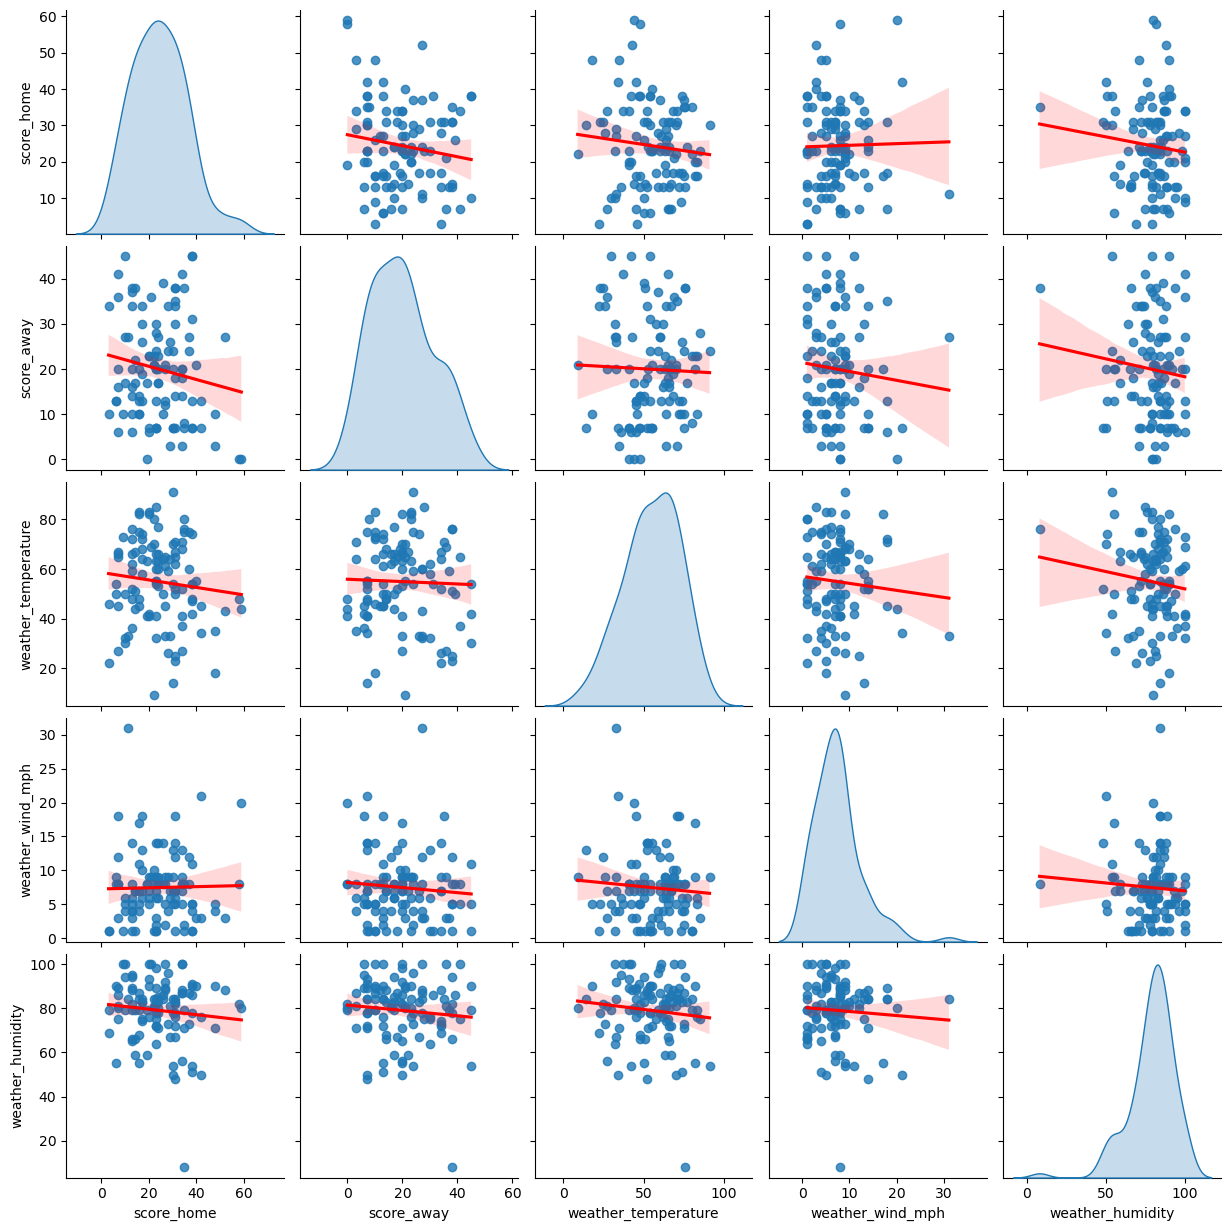

In [38]:
features = ['score_home', 'score_away', 'stadium', 'weather_temperature', 'weather_wind_mph', 'weather_humidity']
sns.pairplot(spread_data[features], kind = 'reg', diag_kind ='kde',
             plot_kws={'line_kws':{'color': 'red'}})